
# LOAD SEM2 DATASET

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
mod1_encoded_sem2 = pd.read_csv('mod1_encoded_sem2.csv')

In [4]:
mod1_encoded_sem2.head()

,LEARNING STYLE,PROGRAM,YEAR,RACE,GENDER,RELIGION,STATE,REGION,INCOME,DEPENDENTS,...,SPM ADDMATH,SPM PHY,SPM CHEM,SPM BIO,SEM1 CGPA,SEM1 MATH,SEM1 PHY,SEM1 CHEM,SEM1 BIO,SEM2 CGPA
0,0,1,1,3,0,2,1,1,6,6,...,6,5,5,3,1,2,1,1,2,1
1,0,1,2,3,0,2,1,0,1,6,...,5,4,6,5,1,1,4,2,5,1
2,0,1,1,3,0,2,1,1,7,2,...,7,2,4,5,1,4,1,3,3,1
3,0,1,2,3,0,2,8,2,2,6,...,5,3,6,4,2,3,5,4,1,2
4,0,1,2,3,0,2,1,2,3,4,...,3,4,6,5,1,1,5,3,2,1


In [5]:
mod1_encoded_sem2.columns

Index(['LEARNING STYLE', 'PROGRAM', 'YEAR', 'RACE', 'GENDER', 'RELIGION',
       'STATE', 'REGION', 'INCOME', 'DEPENDENTS', 'SCHOOL', 'SPM ADDMATH',
       'SPM PHY', 'SPM CHEM', 'SPM BIO', 'SEM1 CGPA', 'SEM1 MATH', 'SEM1 PHY',
       'SEM1 CHEM', 'SEM1 BIO', 'SEM2 CGPA'],
      dtype='object')

In [6]:
mod1_encoded_sem2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LEARNING STYLE  1241 non-null   int64
 1   PROGRAM         1241 non-null   int64
 2   YEAR            1241 non-null   int64
 3   RACE            1241 non-null   int64
 4   GENDER          1241 non-null   int64
 5   RELIGION        1241 non-null   int64
 6   STATE           1241 non-null   int64
 7   REGION          1241 non-null   int64
 8   INCOME          1241 non-null   int64
 9   DEPENDENTS      1241 non-null   int64
 10  SCHOOL          1241 non-null   int64
 11  SPM ADDMATH     1241 non-null   int64
 12  SPM PHY         1241 non-null   int64
 13  SPM CHEM        1241 non-null   int64
 14  SPM BIO         1241 non-null   int64
 15  SEM1 CGPA       1241 non-null   int64
 16  SEM1 MATH       1241 non-null   int64
 17  SEM1 PHY        1241 non-null   int64
 18  SEM1 CHEM       1241 non-nul

# CREATE TRAIN_TEST_SPLIT

In [7]:
## CREATE TRAIN TEST SPLIT TO AVOID OVERFITTING
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(mod1_encoded_sem2.drop(labels=['SEM2 CGPA'],axis=1),
                                                 mod1_encoded_sem2['SEM2 CGPA'],test_size=0.3,random_state=0)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 959 to 684
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LEARNING STYLE  868 non-null    int64
 1   PROGRAM         868 non-null    int64
 2   YEAR            868 non-null    int64
 3   RACE            868 non-null    int64
 4   GENDER          868 non-null    int64
 5   RELIGION        868 non-null    int64
 6   STATE           868 non-null    int64
 7   REGION          868 non-null    int64
 8   INCOME          868 non-null    int64
 9   DEPENDENTS      868 non-null    int64
 10  SCHOOL          868 non-null    int64
 11  SPM ADDMATH     868 non-null    int64
 12  SPM PHY         868 non-null    int64
 13  SPM CHEM        868 non-null    int64
 14  SPM BIO         868 non-null    int64
 15  SEM1 CGPA       868 non-null    int64
 16  SEM1 MATH       868 non-null    int64
 17  SEM1 PHY        868 non-null    int64
 18  SEM1 CHEM       868 non-null

In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 1031 to 825
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LEARNING STYLE  373 non-null    int64
 1   PROGRAM         373 non-null    int64
 2   YEAR            373 non-null    int64
 3   RACE            373 non-null    int64
 4   GENDER          373 non-null    int64
 5   RELIGION        373 non-null    int64
 6   STATE           373 non-null    int64
 7   REGION          373 non-null    int64
 8   INCOME          373 non-null    int64
 9   DEPENDENTS      373 non-null    int64
 10  SCHOOL          373 non-null    int64
 11  SPM ADDMATH     373 non-null    int64
 12  SPM PHY         373 non-null    int64
 13  SPM CHEM        373 non-null    int64
 14  SPM BIO         373 non-null    int64
 15  SEM1 CGPA       373 non-null    int64
 16  SEM1 MATH       373 non-null    int64
 17  SEM1 PHY        373 non-null    int64
 18  SEM1 CHEM       373 non-nul

# 1. FEATURE SELECTION : MUTUAL INFO

In [10]:
from sklearn.feature_selection import mutual_info_classif
## DETERMINE THE MUTUAL INFORMATION
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.04538743, 0.01158632, 0.0469807 , 0.09586865, 0.01787168,
       0.10531678, 0.05964765, 0.01328708, 0.00595643, 0.00255823,
       0.        , 0.06908683, 0.06901431, 0.07933234, 0.06518119,
       0.40495728, 0.24041899, 0.26294389, 0.29647387, 0.21625294])

In [11]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

SEM1 CGPA         0.404957
SEM1 CHEM         0.296474
SEM1 PHY          0.262944
SEM1 MATH         0.240419
SEM1 BIO          0.216253
RELIGION          0.105317
RACE              0.095869
SPM CHEM          0.079332
SPM ADDMATH       0.069087
SPM PHY           0.069014
SPM BIO           0.065181
STATE             0.059648
YEAR              0.046981
LEARNING STYLE    0.045387
GENDER            0.017872
REGION            0.013287
PROGRAM           0.011586
INCOME            0.005956
DEPENDENTS        0.002558
SCHOOL            0.000000
dtype: float64

<AxesSubplot:>

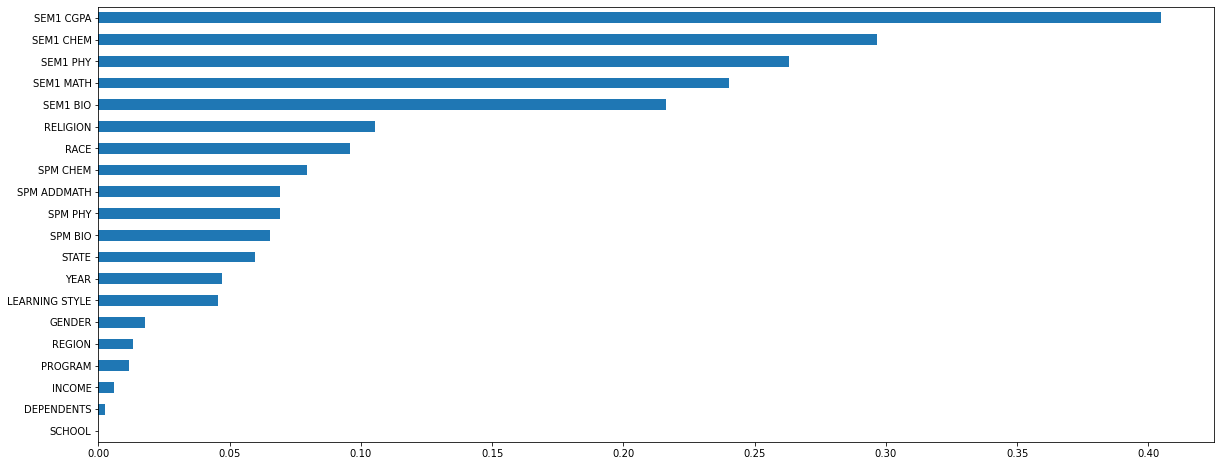

In [12]:
mutual_info.sort_values(ascending=True).plot.barh(figsize=(20,8))

# 2. FEATURE SELECTION : CHI SQUARED TEST

In [13]:
## PERFORM CHI2 TEST
from sklearn.feature_selection import chi2
f_p_values = chi2(X_train,y_train)
f_p_values
## CHI2 RETURNS TWO VALUES : FSCORE & P-VALUE
## HIGHER FSCORE MEANS THE FEATURE IS MORE IMPORTANT 
## LOWER P-VALUE MEANS THE FEATURE IS MORE IMPORTANT

(array([  9.68199055,   5.23060849,   4.43970966,  18.73114607,
          7.03386687,  10.73767365,  85.18318009,   4.94790824,
         23.20921473,   4.14775906,   5.25266041,  98.50653617,
         68.38718313,  96.10348453,  69.9017852 , 457.06694615,
        458.97535904, 556.23415471, 693.40064386, 454.28752022]),
 array([4.61391214e-002, 2.64443349e-001, 3.49756334e-001, 8.87516891e-004,
        1.34109303e-001, 2.96759011e-002, 1.38710769e-017, 2.92684320e-001,
        1.15003850e-004, 3.86378014e-001, 2.62341279e-001, 2.04522817e-020,
        4.97021821e-014, 6.63816323e-020, 2.38083821e-014, 1.28830811e-097,
        4.98212748e-098, 4.58220369e-119, 9.35768464e-149, 5.13957230e-097]))

In [14]:
f_scores = pd.Series(f_p_values[0])
f_scores.index = X_train.columns
f_scores.sort_values(ascending=False)

SEM1 CHEM         693.400644
SEM1 PHY          556.234155
SEM1 MATH         458.975359
SEM1 CGPA         457.066946
SEM1 BIO          454.287520
SPM ADDMATH        98.506536
SPM CHEM           96.103485
STATE              85.183180
SPM BIO            69.901785
SPM PHY            68.387183
INCOME             23.209215
RACE               18.731146
RELIGION           10.737674
LEARNING STYLE      9.681991
GENDER              7.033867
SCHOOL              5.252660
PROGRAM             5.230608
REGION              4.947908
YEAR                4.439710
DEPENDENTS          4.147759
dtype: float64

<AxesSubplot:>

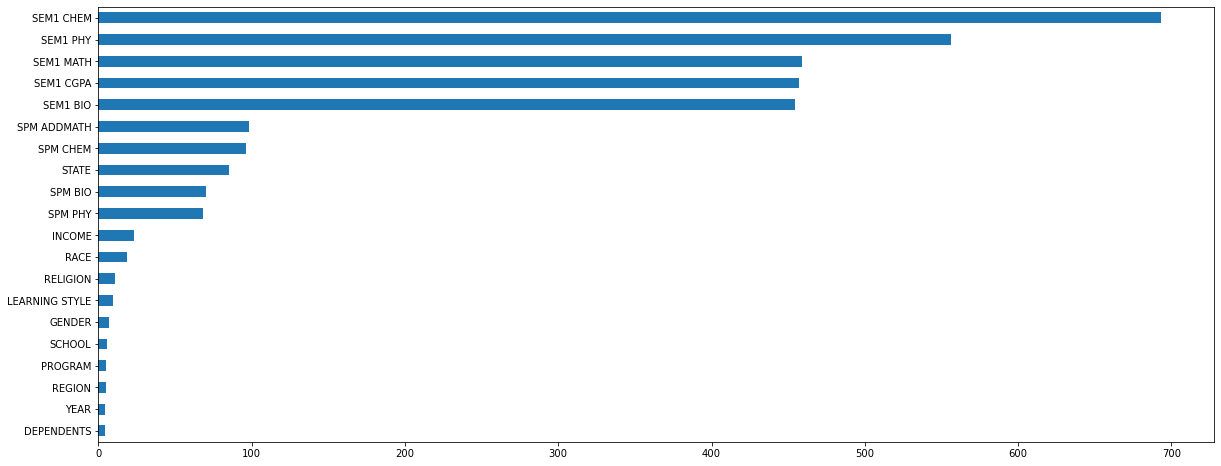

In [16]:
f_scores.sort_values(ascending=True).plot.barh(figsize=(20,8))

In [17]:
## OBSERVATION
# SEM1 CHEM IS THE MOST IMPORTANT COLUMN (HIGHEST F-SCORE) WHEN COMPARED TO THE OUTPUT FEATURE (TARGET) SEM2 CGPA